In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import dill


In [ ]:
df=pd.read_excel("new faculty.xlsx")
df.head()

In [7]:
df['ZONE']=df['ZONE'].replace()
df.head()

,ID,AGE,TETSCORE,EXPERIENCE,SUBJECT,LEVEL,GENDER,ZONE
0,1,27,75,1,MATHS,4,0,SCIENCE
1,2,32,97,2,SOCIAL,6,0,SCIENCE
2,3,31,91,2,MATHS,2,1,SOCIAL
3,4,32,85,6,SCIENCE,4,1,MATHS
4,5,33,82,3,MATHS,6,1,TELUGU


In [9]:
df['SUBJECT']=df['SUBJECT'].replace({'MATHS':1, 'SOCIAL':2,'SCIENCE':3,'ENGLISH':4,'TELUGU':5})
df.head()

,ID,AGE,TETSCORE,EXPERIENCE,SUBJECT,LEVEL,GENDER,ZONE
0,1,27,75,1,1,4,0,SCIENCE
1,2,32,97,2,2,6,0,SCIENCE
2,3,31,91,2,1,2,1,SOCIAL
3,4,32,85,6,3,4,1,MATHS
4,5,33,82,3,1,6,1,TELUGU


In [11]:
# df.to_excel("faculty.xlsx")

In [26]:
df_raw=pd.read_excel("data/faculty.xlsx")
df_raw.head()

,ID,AGE,TETSCORE,EXPERIENCE,ZONE,LEVEL,GENDER,SUBJECT
0,1,27,75,1,1,4,0,SCIENCE
1,2,32,97,2,2,6,0,SCIENCE
2,3,31,91,2,1,2,1,SOCIAL
3,4,32,85,6,3,4,1,MATHS
4,5,33,82,3,1,6,1,TELUGU


In [27]:
df_raw.columns

Index(['ID', 'AGE', 'TETSCORE', 'EXPERIENCE', 'ZONE', 'LEVEL', 'GENDER',
       'SUBJECT'],
      dtype='object')

In [28]:
id=df_raw['ID']

In [29]:
df=pd.get_dummies(data=df_raw, columns=['ZONE','SUBJECT'])
df=df.drop(["ID"],axis=1)
df.head()

,AGE,TETSCORE,EXPERIENCE,LEVEL,GENDER,ZONE_1,ZONE_2,ZONE_3,ZONE_4,ZONE_5,SUBJECT_ENGLISH,SUBJECT_MATHS,SUBJECT_SCIENCE,SUBJECT_SOCIAL,SUBJECT_TELUGU
0,27,75,1,4,0,1,0,0,0,0,0,0,1,0,0
1,32,97,2,6,0,0,1,0,0,0,0,0,1,0,0
2,31,91,2,2,1,1,0,0,0,0,0,0,0,1,0
3,32,85,6,4,1,0,0,1,0,0,0,1,0,0,0
4,33,82,3,6,1,1,0,0,0,0,0,0,0,0,1


In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(df)
df=pd.DataFrame(rescaledX,columns=df.columns)
df.head()

,AGE,TETSCORE,EXPERIENCE,LEVEL,GENDER,ZONE_1,ZONE_2,ZONE_3,ZONE_4,ZONE_5,SUBJECT_ENGLISH,SUBJECT_MATHS,SUBJECT_SCIENCE,SUBJECT_SOCIAL,SUBJECT_TELUGU
0,0.133333,0.166667,0.1,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.466667,0.900000,0.2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.400000,0.700000,0.2,0.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.466667,0.500000,0.6,0.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.533333,0.400000,0.3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
# with open("preprocessor_model.pkl", "wb") as file_obj:
#     dill.dump(scaler, file_obj)

In [32]:
df2=df

C:\Users\Teja\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

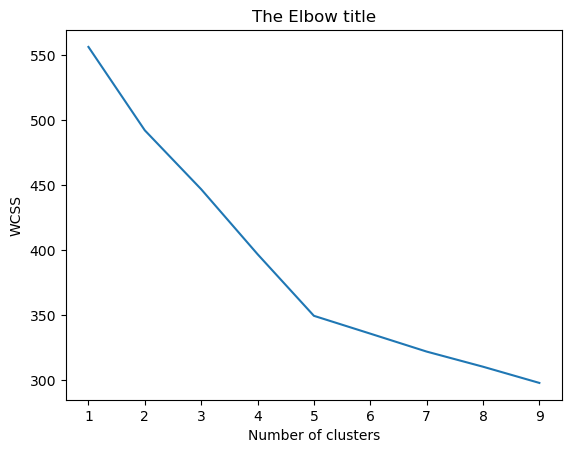

In [33]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(df2)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [34]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(df2)

df2['cluster']=kmeans.labels_
df2['ID']=id
df2

,AGE,TETSCORE,EXPERIENCE,LEVEL,GENDER,ZONE_1,ZONE_2,ZONE_3,ZONE_4,ZONE_5,SUBJECT_ENGLISH,SUBJECT_MATHS,SUBJECT_SCIENCE,SUBJECT_SOCIAL,SUBJECT_TELUGU,cluster,ID
0,0.133333,0.166667,0.1,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,1
1,0.466667,0.900000,0.2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,2
2,0.400000,0.700000,0.2,0.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3
3,0.466667,0.500000,0.6,0.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,4
4,0.533333,0.400000,0.3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.400000,0.433333,0.3,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,249
249,0.200000,0.066667,0.0,0.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,250
250,0.266667,0.566667,0.3,0.2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,251
251,0.466667,0.166667,0.5,0.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3,252


In [36]:
# clu=df2["cluster"]

In [37]:
# add_df=pd.read_excel("data/address.xlsx")
# add_df.head()

,ID,NAME,ADDRESS,MOBILE,EMAIL
0,1,Alka Verma,"18, Sector 5, Faridabad",9876543213,alka.verma@example.com
1,2,Abhishek Sharma,"56/3, Gurgaon, Haryana",9999999999,abhishek.sharma@example.com
2,3,Aishwarya Rai,"25, Juhu Beach, Mumbai",9876543210,aishwarya.rai@example.com
3,4,Ajay Singh,"41, Malviya Nagar, New Delhi",9898989898,ajay.singh@example.com
4,5,Akanksha Gupta,"12, Sector 15, Noida",9876543211,akanksha.gupta@example.com


In [39]:
# fac_df=pd.read_excel("data/faculty.xlsx")
# fac_df["cluster"]=clu
# fac_df.head()

,ID,AGE,TETSCORE,EXPERIENCE,ZONE,LEVEL,GENDER,SUBJECT,cluster
0,1,27,75,1,1,4,0,SCIENCE,3
1,2,32,97,2,2,6,0,SCIENCE,3
2,3,31,91,2,1,2,1,SOCIAL,1
3,4,32,85,6,3,4,1,MATHS,2
4,5,33,82,3,1,6,1,TELUGU,0


In [40]:
# final_df=pd.merge(fac_df, add_df, on='ID')
# final_df.head()

,ID,AGE,TETSCORE,EXPERIENCE,ZONE,LEVEL,GENDER,SUBJECT,cluster,NAME,ADDRESS,MOBILE,EMAIL
0,1,27,75,1,1,4,0,SCIENCE,3,Alka Verma,"18, Sector 5, Faridabad",9876543213,alka.verma@example.com
1,2,32,97,2,2,6,0,SCIENCE,3,Abhishek Sharma,"56/3, Gurgaon, Haryana",9999999999,abhishek.sharma@example.com
2,3,31,91,2,1,2,1,SOCIAL,1,Aishwarya Rai,"25, Juhu Beach, Mumbai",9876543210,aishwarya.rai@example.com
3,4,32,85,6,3,4,1,MATHS,2,Ajay Singh,"41, Malviya Nagar, New Delhi",9898989898,ajay.singh@example.com
4,5,33,82,3,1,6,1,TELUGU,0,Akanksha Gupta,"12, Sector 15, Noida",9876543211,akanksha.gupta@example.com


In [41]:
# final_df.to_excel("final_data.xlsx")

In [35]:
# with open("model.pkl", "wb") as file_obj:
#     dill.dump(kmeans, file_obj)

In [17]:
def fun(li):
    di={'AGE':0, 'TETSCORE':0, 'EXPERIENCE':0,"LEVEL":0,'GENDER':0,'ZONE_1':0, 'ZONE_2':0, 'ZONE_3':0, 'ZONE_4':0,'ZONE_5':0,
         'SUBJECT_ENGLISH':0,'SUBJECT_MATHS':0,'SUBJECT_SCIENCE':0,'SUBJECT_SOCIAL':0,'SUBJECT_TELUGU':0}
    for i in li:
        di[i]=li[i]
    
    return pd.DataFrame.from_dict(di,orient='index').T

In [18]:
li={'AGE':30, 'TETSCORE':90, 'EXPERIENCE':8, 'ZONE_1':1, 'SUBJECT_MATHS':1,"LEVEL":6}
df3=fun(li)
df3

,AGE,TETSCORE,EXPERIENCE,LEVEL,GENDER,ZONE_1,ZONE_2,ZONE_3,ZONE_4,ZONE_5,SUBJECT_ENGLISH,SUBJECT_MATHS,SUBJECT_SCIENCE,SUBJECT_SOCIAL,SUBJECT_TELUGU
0,30,90,8,6,0,1,0,0,0,0,0,1,0,0,0


In [19]:
# with open("preprocessor_model", "rb") as mo:
#     sc=dill.load(mo)
    

In [20]:
test_rescaledX = scaler.transform(df3)
df3=pd.DataFrame(test_rescaledX,columns=df3.columns)
df3.head()

,AGE,TETSCORE,EXPERIENCE,LEVEL,GENDER,ZONE_1,ZONE_2,ZONE_3,ZONE_4,ZONE_5,SUBJECT_ENGLISH,SUBJECT_MATHS,SUBJECT_SCIENCE,SUBJECT_SOCIAL,SUBJECT_TELUGU
0,0.333333,0.666667,0.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
res=kmeans.predict(df3)
res

array([1])

In [33]:
res_df=df2[df2["cluster"]==res[0]]
res_df.head()

,AGE,TETSCORE,EXPERIENCE,LEVEL,GENDER,ZONE_1,ZONE_2,ZONE_3,ZONE_4,ZONE_5,SUBJECT_ENGLISH,SUBJECT_MATHS,SUBJECT_SCIENCE,SUBJECT_SOCIAL,SUBJECT_TELUGU,cluster,ID
3,0.466667,0.500000,0.6,0.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,4
6,0.400000,0.066667,0.4,0.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,7
7,0.800000,0.733333,0.7,0.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,8
8,0.466667,0.966667,0.2,0.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,9
16,0.600000,1.000000,0.9,0.6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,17


In [34]:
details_df=pd.read_excel("address.xlsx")
details_df.head()


,ID,NAME,ADDRESS,MOBILE,EMAIL
0,1,Alka Verma,"18, Sector 5, Faridabad",9876543213,alka.verma@example.com
1,2,Abhishek Sharma,"56/3, Gurgaon, Haryana",9999999999,abhishek.sharma@example.com
2,3,Aishwarya Rai,"25, Juhu Beach, Mumbai",9876543210,aishwarya.rai@example.com
3,4,Ajay Singh,"41, Malviya Nagar, New Delhi",9898989898,ajay.singh@example.com
4,5,Akanksha Gupta,"12, Sector 15, Noida",9876543211,akanksha.gupta@example.com


In [38]:
fac_df=df_raw[df_raw['ID'].isin(list(res_df['ID']))]
fac_df

,ID,AGE,TETSCORE,EXPERIENCE,ZONE,LEVEL,GENDER,SUBJECT
3,4,32,85,6,3,4,1,MATHS
6,7,31,72,4,1,5,0,MATHS
7,8,37,92,7,5,2,1,MATHS
8,9,32,99,2,5,3,1,MATHS
16,17,34,100,9,1,4,1,MATHS
...,...,...,...,...,...,...,...,...
228,229,32,100,4,4,2,1,MATHS
234,235,31,99,2,1,1,0,MATHS
237,238,30,85,5,2,4,1,MATHS
244,245,36,90,10,1,1,0,MATHS


In [39]:
final_df=pd.merge(fac_df, details_df, on='ID')
final_df.head()

,ID,AGE,TETSCORE,EXPERIENCE,ZONE,LEVEL,GENDER,SUBJECT,NAME,ADDRESS,MOBILE,EMAIL
0,4,32,85,6,3,4,1,MATHS,Ajay Singh,"41, Malviya Nagar, New Delhi",9898989898,ajay.singh@example.com
1,7,31,72,4,1,5,0,MATHS,Alka Verma,"18, Sector 5, Faridabad",9876543213,alka.verma@example.com
2,8,37,92,7,5,2,1,MATHS,Alok Gupta,"15, Preet Vihar, New Delhi",9876543214,alok.gupta@example.com
3,9,32,99,2,5,3,1,MATHS,Aman Singh,"22, DLF Phase 3, Gurgaon",9876543215,aman.singh@example.com
4,17,34,100,9,1,4,1,MATHS,Ankit Singh,"16, Sector 15, Noida",9876543223,ankit.singh@example.com


In [ ]:
# final_df.to_excel("output_faculty_list.xlsx")